# Ecuaciones no lineales - Método iterativo general

Dada $f:\mathbb{R}\to\mathbb{R}$, se plantea el problema de hallar $\alpha \in \mathbb{R}$ tal que:

$$f(\alpha) = 0.$$

En general, $f$ es cualquier función, por lo que no necesariamente es posible "despejar" $\alpha$. Debemos hallar la solución a lo anterior numéricamente.

En el **método iterativo general** se busca resolver el problema anterior planteando un problema equivalente de la forma:

$$ f(\alpha)= 0 \Leftrightarrow g(\alpha) = \alpha.$$

Es decir, se busca una función $g:\mathbb{R}\to\mathbb{R}$ tal que la raíz buscada sea *punto fijo* de dicha función.


## Ejemplo

Consideremos como ejemplo $f(x) = xe^{x}-1$, podemos tomar:

$$g_1(x) = e^{-x}: \quad g_1(x) = x \Leftrightarrow x=e^{-x} \Leftrightarrow xe^{x}=1 \Leftrightarrow f(x)=0.$$

$$g_2(x) = xe^{x}+x-1: \quad g_2(x) = x  \Leftrightarrow xe^{x} + x -1 = x \Leftrightarrow xe^{x} = 1 \Leftrightarrow f(x)=0.$$

Ambas cumplen la condición. Sin embargo, no toda función $g$ es adecuada para resolver el problema, como veremos.


## Método iterativo general

El método iterativo general o MIG es una estrategia para resolver ecuaciones de la forma $x=g(x)$ con $g$ continua. El algoritmo es:

* Tomo $x_0$ aproximación inicial de la solución.
* Construyo la recursión $x_{k+1}=g(x_k)$.

Si la iteración anterior converge, existe $\lim_{k\to\infty} x_k = \alpha$. Tomando límite en la recursión debe cumplirse que:

$$\alpha = \lim_{k\to\infty} x_{k+1} = \lim_{k\to\infty} g(x_k).$$

Como $g$ continua, $\lim_{k\to\infty} g(x_k) = g(\lim_{k\to\infty} x_k) = g(\alpha)$. De donde si existe el límite debe cumplir:

$$\alpha=g(\alpha).$$

Es decir, es solución del problema.

## Ejemplo

Apliquemos lo anterior a las funciones $g_1$ y $g_2$, tomando como condición inicial $x_0=1$.

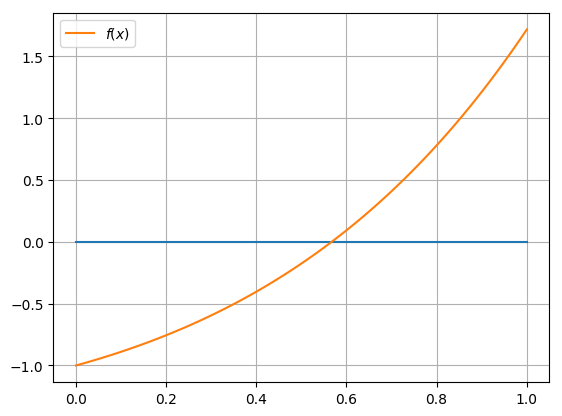

In [1]:
using PyPlot #paquete de gráficos

#defino las funciones
f(x) = x*exp(x) - 1;

#defino un intervalo de trabajo
xx=(0:.01:1);

plot(xx,0*xx)
plot(xx,f.(xx), label=L"f(x)")
grid();
legend();

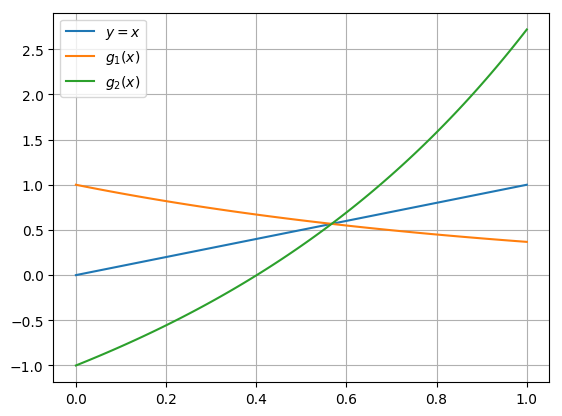

In [2]:
g1(x) = exp(-x);
g2(x) = x*exp(x)+x-1;

plot(xx,xx, label=L"$y=x$")
plot(xx,g1.(xx),label=L"$g_1(x)$")
plot(xx,g2.(xx), label=L"$g_2(x)$")
grid();
legend();

In [3]:
#funcion que ejecuta el MIG. Se le pasa la función g, la condición inicial, 
#la tolerancia de parada y el no. maximo de iteraciones
#Devuelve la raíz, las iteraciones realizadas, y la evolución de x y del error.
function mig(g,x0,tol,maxiter)
    
    x=x0;
    X=[x];

    #inicializo vectores vacíos para ir completando
    E=Array{Float64}[];
    
    err=Inf;
    k=0;
    
    while err>tol && k<maxiter
        
        xviejo=x;
        x=g(xviejo);
        
        err=abs(x-xviejo);
        k=k+1;
        X=[X;x];
        E=[E;err];
    end
    
    return x,k,X,E;
    
end;

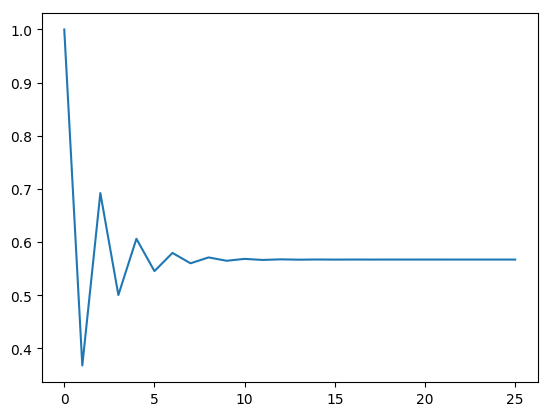

In [4]:
x1,k1,X1,E1 = mig(g1,1,1e-6,50);
plot((0:k1),X1);


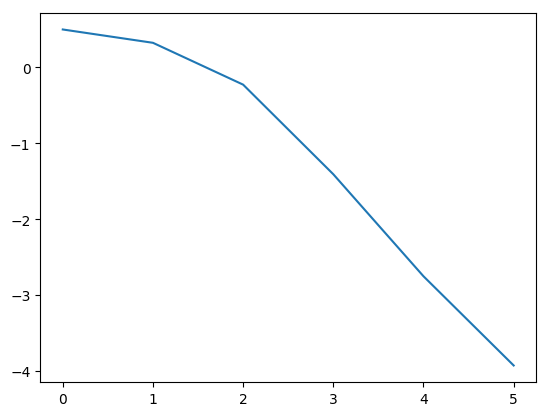

In [5]:
x2,k2,X2,E2 = mig(g2,0.5,1e-6,5);
plot((0:k2),X2);

## Convergencia

Como se ve en el ejemplo, la función $g_1$ produce un algoritmo convergente, la $g_2$ no. Queremos analizar entonces condiciones generales para que el método converja.

Conviene analizar gráficamente lo que sucede:

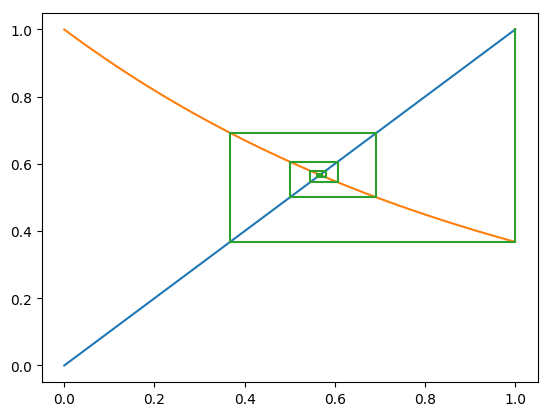

In [6]:
plot(xx,xx)
plot(xx,g1.(xx))

xx1 = [X1';X1']
xx1=reshape(xx1,2*k1+2,1)
gx1 = [X1';g1.(X1)']
gx1=reshape(gx1,2*k1+2,1)

plot(xx1,gx1);

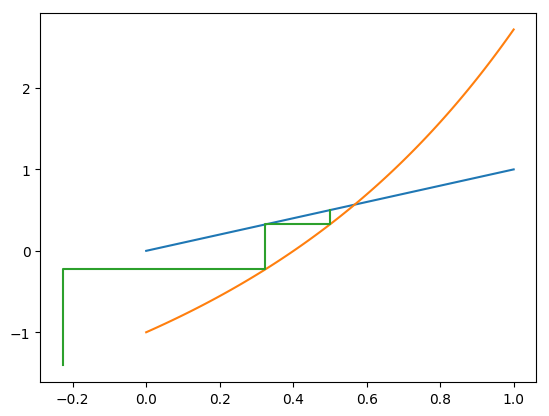

In [7]:
plot(xx,xx)
plot(xx,g2.(xx))

#corremos de nuevo el metodo con x0=0.6 para que se vea mejor.
x2,k2,X2,E2 = mig(g2,0.5,1e-6,10);

xx2 = [X2';X2']
xx2 = reshape(xx2,2*k2+2,1)
gx2 = [X2';g2.(X2)']
gx2 = reshape(gx2,2*k2+2,1)

plot(xx2[1:6],gx2[1:6]);

## Observación

Recordemos que $x_{k+1} = g(x_k)$. Para que el método converja, necesitamos que $|x_{k+1}-\alpha| \to 0$. Observemos que:

$$|x_{k+1} - \alpha| = |g(x_k) - \alpha| = |g(x_k)-g(\alpha)|$$

Por lo tanto, necesitamos que $|g(x_k) - g(\alpha)|<|x_k-\alpha|$ para que el error decrezca. Una función que cumple lo anterior se dice *contractiva*.

## Funciones contractivas y MIG

> **Definición**: una función $g:U\to \mathbb{R}$ con $U\subset \mathbb{R}$ se dice *contractiva* si existe $k<1$ tal que:
> 
> $$|g(x) - g(y)| \leqslant k|x-y| \quad \forall x,y\in U.$$
>

Se tiene el siguiente:

> **Teorema**: si $g$ es contractiva en $U$ y existe un punto fijo $\alpha \in U$ entonces la iteración $x_{k+1} = g(x_k)$ converge a $\alpha$. Además $\alpha$ es único.


## Condición suficiente

Se plantea el problema de determinar si una función es contractiva o no. Allí resulta útil el siguiente criterio.

> **Teorema**: si $g$ es derivable en $\alpha$, $g(\alpha)=\alpha$ y $|g'(\alpha)|<1$ entonces existe un entorno de $\alpha$ donde $g$ es contractiva.

Es decir, si en la solución la derivada es menor a $1$ en valor absoluto, el método converge si arrancamos suficientemente cerca de la raíz.

### Ejemplo

* Para $g_1(x) = e^{-x}$ se tiene que $g'_1(x) = -e^{-x}$ por lo que $|g'(\alpha)| = e^{-\alpha} <1$ ya que la raíz es positiva. Por lo tanto, el método converge.

* Para $g_2(x) = xe^{x}+x-1$ se tiene que $g'_2(x) = xe^{x}+1$ de donde $g'(\alpha) = \alpha e^{\alpha} + 1$. Usando que $\alpha e^{\alpha} = 1$ se tiene que $|g'(\alpha)| = 2 > 1$ por lo que el método no converge.



## Orden del método iterativo general

Como ya vimos, si $|g'(\alpha)|<1$, el método es convergente. Surge la pregunta de con qué orden. Se tiene la siguiente:

> **Proposición**: Si $|g'(\alpha)|<1$ y $g'(\alpha)\neq 0$ entonces el MIG es de orden $p=1$ con constance $c=|g'(\alpha)|$.

### Ejemplo:

Tomando $g_1(x) = e^{-x}$, grafiquemos la evolución del error en escala logarítmica:

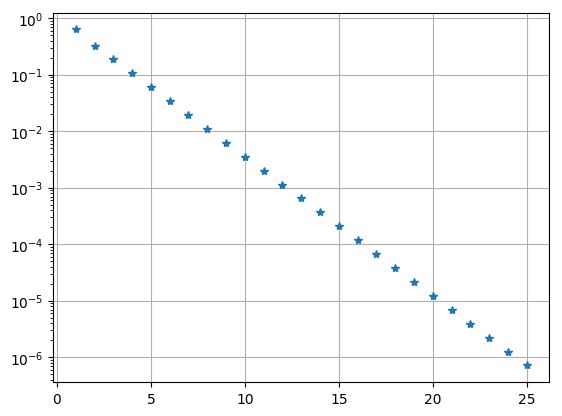

E_{25}/E_{24}=0.567143389496028
|g'(x)|=exp(-x)=0.56714343762633


In [8]:
semilogy((1:k1),E1,"*")
grid();
xticks(0:5:k1);
println("E_{$k1}/E_{$(k1-1)}=$(E1[end]/E1[end-1])")
println("|g'(x)|=exp(-x)=$(exp(-x1))")

## Teorema del MIG

En general el orden del MIG es mejor cuanto más pequeña es la derivada en la raíz. En particular, si $g'(\alpha)=0$ entonces el método es de mayor orden, como indica el siguiente:

> **Teorema:** Si $g(x)$ es derivable $p$ veces con $p>1$ y 
>
> $$g'(\alpha)=g''(\alpha)=\ldots = g^{(p-1)}(\alpha)=0,$$
>
> con $g^{(p)}(\alpha)\neq 0$, entonces el MIG es de orden $p$ y con constante $|g^{(p)}|/p!$, es decir:
>
> $$ \lim_{k\to\infty} \frac{E_{k+1}}{E_k^p} = \frac{|g^{(p)}|}{p!}.$$


### Ejemplo

Para el problema anterior, consideremos la función $g_3$ dada por:

$$ g_3(x) = \frac{(x+1)e^{-x}}{1+e^{-x}}.$$

Puede verse que $g_3(x)=x$ si $xe^{x}-1=0$. Además, puede verse que $g_3'(x)=0$ por lo que el método es al menos de orden $2$.

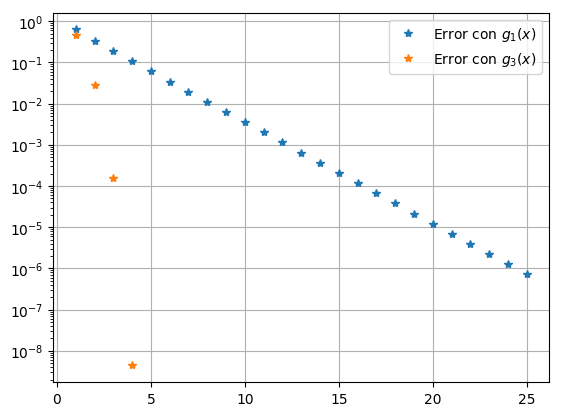

In [9]:
g3(x) = (x+1).*exp(-x)/(1+exp(-x))
x3,k3,X3,E3 = mig(g3,1,1e-6,50);

semilogy((1:k1),E1, "*", label=L"Error con $g_1(x)$")
semilogy((1:k3),E3, "*", label=L"Error con $g_3(x)$")
grid()
legend();

## Conclusiones

* El método iterativo general es una estrategia de solución recursiva al problema de hallar raíces.
* Para su convergencia, es necesario que la función de iteración sea contractiva alrededor del punto fijo (raíz).
* Condición suficiente: $|g'(\alpha)|<1$.
* El orden del método en general es $1$. Aumenta si $g$ tiene derivadas nulas en el punto fijo.

## Ejercicio

Considere el polinomio:

$$p(x) = x^3+4x^2-10$$

1. Grafique el polinomio anterior y observe que tiene una raíz única en el intervalo $[1,2]$.
2. Considere las siguientes 3 posibles funciones de iteración:

    a. $g_1(x) = x-x^3-4x^2+10$.

    b. $g_2(x) = \sqrt{\frac{10}{4+x}}$.
       
    c. $g_3(x) = \frac{1}{2}\sqrt{10-x^3}$.
    
    Verifique que $x=g(x)$ es raíz del polinomio en cada uno de los casos.
3. Para las funciones anteriores, utilizando las condiciones de convergencia del MIG, indique cuáles son adecuadas para hallar la raíz y cuál será más conveniente usar.
4. Implemente el MIG para las funciones anteriores (que cumplan la condición de convergencia) y analice la evolución del error.
5. Compare el no. de iteraciones necesarias con cada una en términos del orden y la constante del método.